In [ ]:
                                            '''BWF-Usama Mahtab'''

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [55]:
df = pd.read_csv('penguins_size.csv')

In [56]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


**Data Cleaning**

In [57]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [58]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [59]:
df = df.dropna()

In [60]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [61]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [62]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [63]:
df = df.drop(336,axis='index')

## Decision Tree Model

In [64]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)

In [65]:
y = df['species']

**Train_Test_Split**

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

**Fitting Model**

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
model = DecisionTreeClassifier()

In [70]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

**Predicting**

In [71]:
base_pred = model.predict(X_test)

**Plotting Decision Tree**

In [72]:
from sklearn.tree import plot_tree

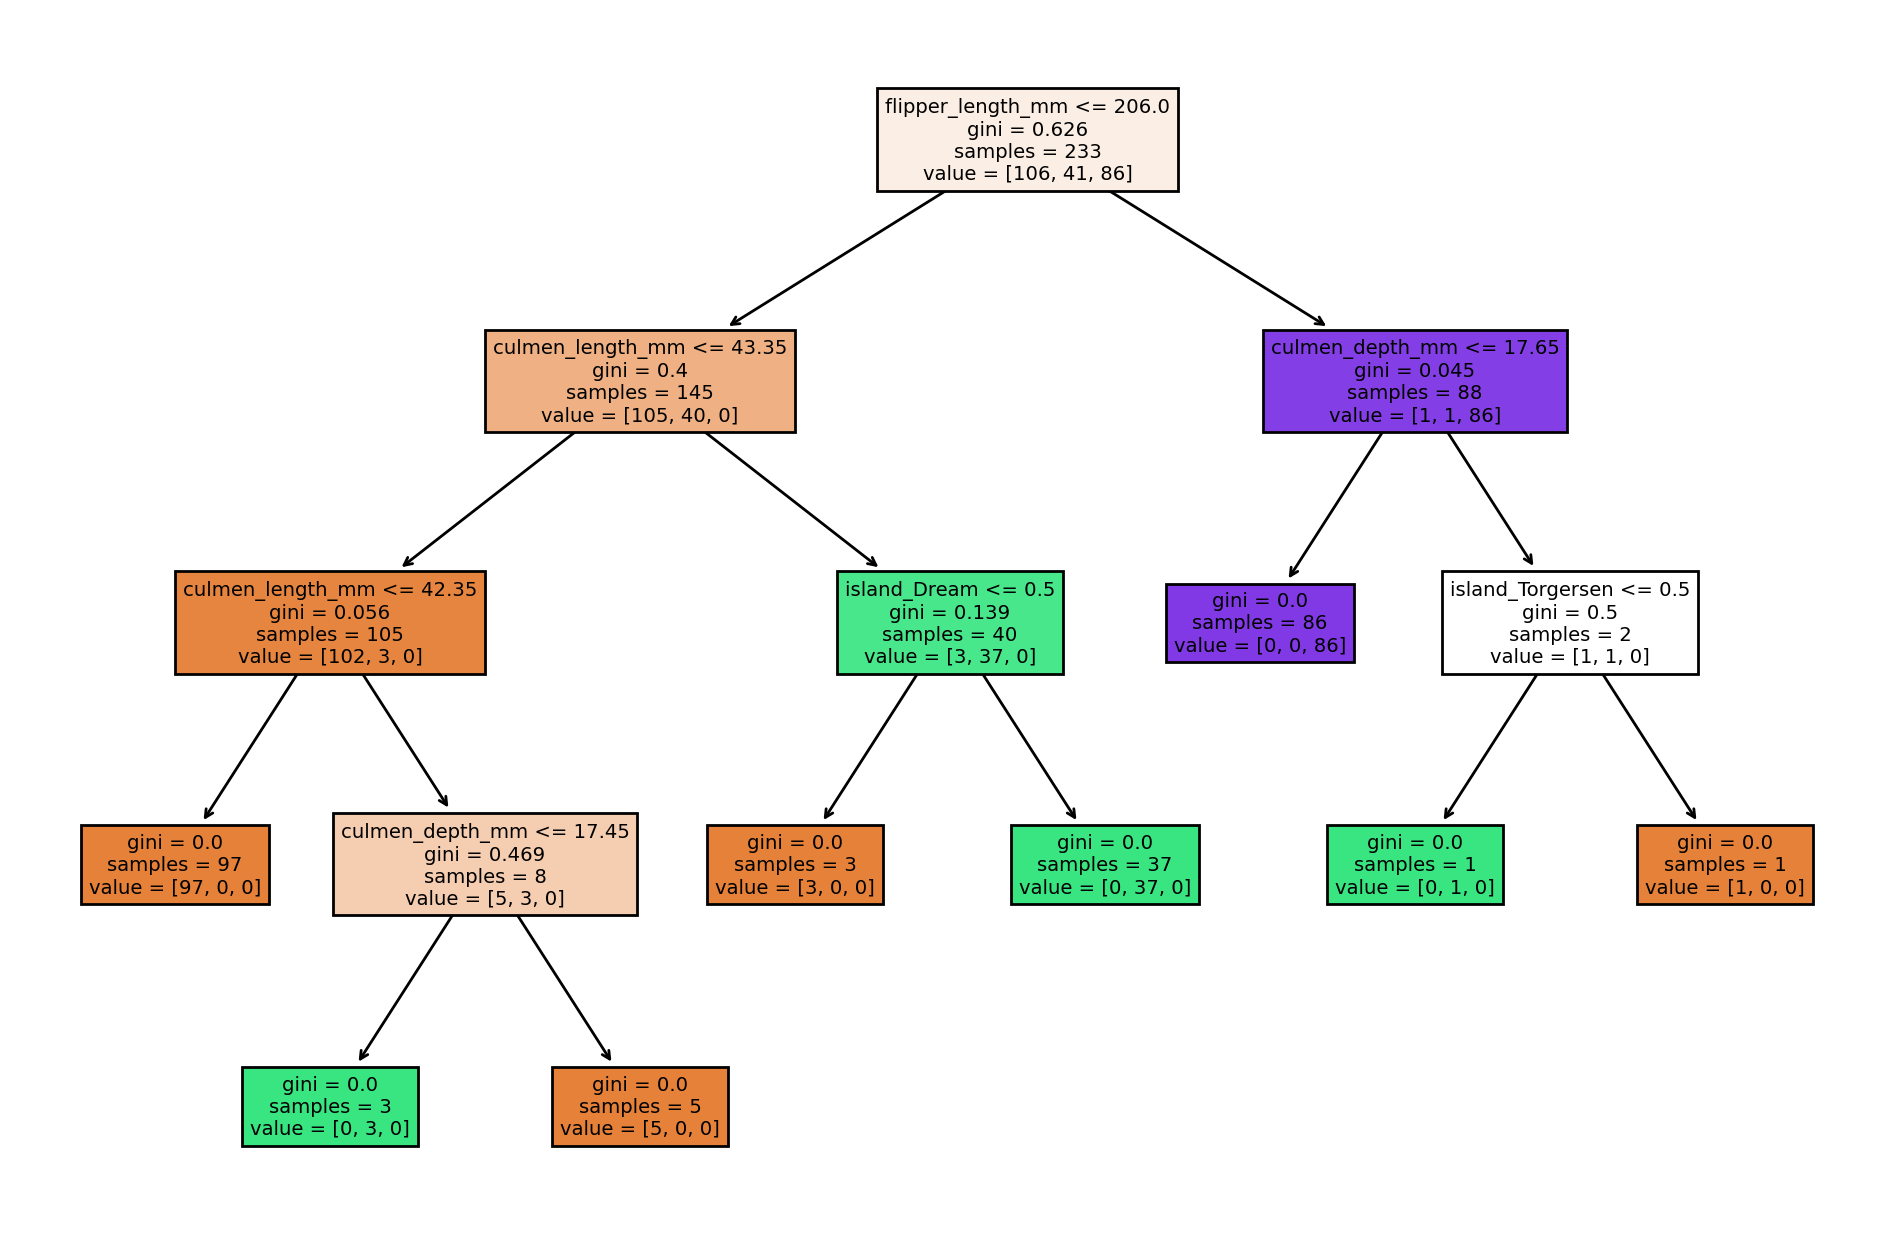

In [73]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(model,feature_names=X.columns,filled=True);

**Confusion Matrix / Classification Report**

In [74]:
def report_model(model):
    model_pred = model.predict(X_test)
    print(classification_report(y_test,model_pred))
    print('\n')
    cm = confusion_matrix(y_test,base_pred)
    sns.heatmap(cm,annot=True,fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.93      0.96      0.95        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100





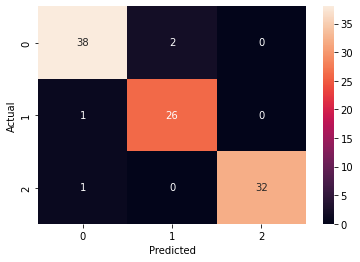

In [75]:
report_model(model)